In [1]:
# Importing all the essential Python libraries

import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
# Importing Stock market data from the Internet

from pandas.io.data import DataReader

/home/srikanth/anaconda3/lib/python3.5/site-packages/pandas/io/data.py:33: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [3]:
# Importing datetime for setting start and end date of the stock market dataset

from datetime import datetime

In [4]:
# Setting the Start and End date for Stock Market Analysis

end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [5]:
# Importing Microsoft Stock Prices

MSFT = DataReader('MSFT','yahoo',start,end)

In [6]:
# Some Basic info about the Microsoft Stock

MSFT.describe()

,Open,High,Low,Close,Volume,Adj Close
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000
mean,46.516653,46.995179,46.107450,46.568247,3.587523e+07,45.960078
std,4.153457,4.185376,4.122094,4.160585,1.737932e+07,4.365508
min,40.340000,40.740002,39.720001,40.290001,9.000500e+06,39.329313
25%,43.380001,43.875000,43.075001,43.480000,2.726250e+07,42.995917
50%,46.130001,46.689999,45.669998,46.230000,3.216520e+07,45.354297
75%,47.539999,47.910000,47.100001,47.580002,3.796700e+07,46.942404
max,56.360001,56.790001,55.529999,56.130001,1.691640e+08,56.130001


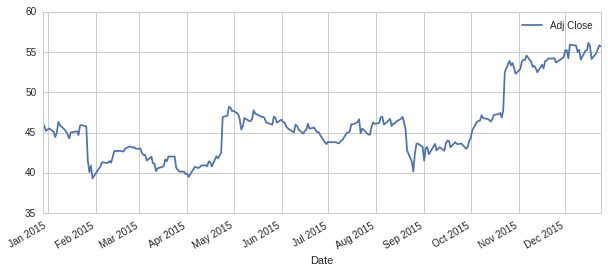

In [7]:
# Plotting Adjusted Closing price for Microsoft Stock

MSFT['Adj Close'].plot(legend=True,figsize=(10,4))

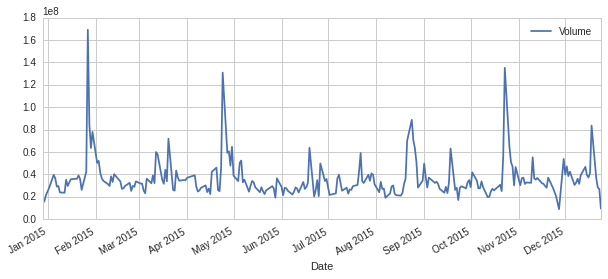

In [8]:
# Plotting the total volume of stock being traded each day

MSFT['Volume'].plot(legend=True,figsize=(10,4))

In [9]:
# Calculating Moving average for 10, 20 and 50 days of the stock price

ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    MSFT[column_name] = pd.rolling_mean(MSFT['Adj Close'],ma)

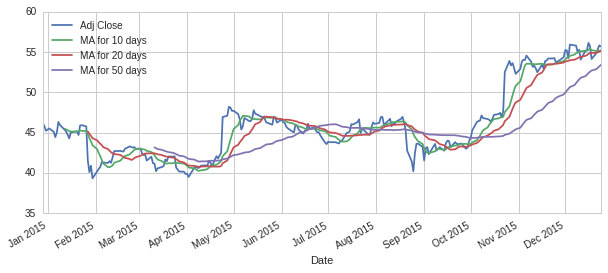

In [10]:
# Plotting the moving averages

MSFT[['Adj Close', 'MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

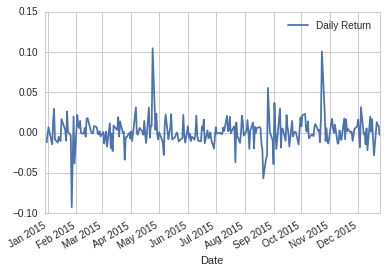

In [11]:
# Plotting Daily returns as a function of Percent change in Adjusted Close value

MSFT['Daily Return'] = MSFT['Adj Close'].pct_change()

MSFT['Daily Return'].plot(legend=True)

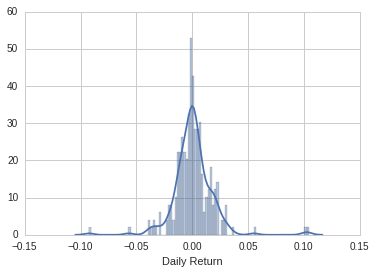

In [12]:
# Plotting the average daily returns of the stock

sns.distplot(MSFT['Daily Return'].dropna(),bins=100)

/home/srikanth/anaconda3/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


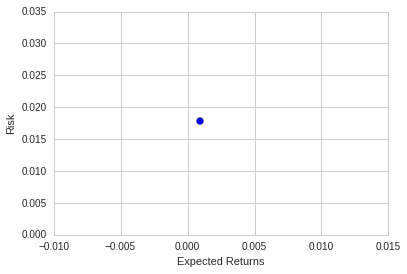

In [13]:
# Risk Analysis --  Comparing the Risk vs Expected returns

rets = MSFT['Daily Return'].dropna()

area = np.pi*15

plt.scatter(rets.mean(),rets.std(),s=area)

plt.xlabel('Expected Returns')
plt.ylabel('Risk')

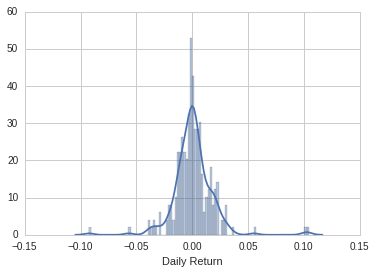

In [14]:
# Visualizing the Value at Risk

sns.distplot(MSFT['Daily Return'].dropna(),bins=100)

In [15]:
# Using Quantiles and the Bootstrap Method to calculate the numerical risk of the stock

MSFT['Daily Return'].quantile(0.05)

-0.021247763699226589

In [16]:
## Monte Carlo Simulation

days = 365

dt = 1/days

mu = rets.mean()

sigma = rets.std()

In [17]:
# Defining the Monte Carlo Simulation Function

def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        
        price[x] = price[x-1] + (price[x-1]* (drift[x] + shock[x]))
        
    return price

In [18]:
MSFT.head()

,Open,High,Low,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,
2014-12-29,47.700001,47.779999,47.259998,47.450001,14439500,46.192472,NaN,NaN,NaN,NaN
2014-12-30,47.439999,47.619999,46.840000,47.020000,16384700,45.773867,NaN,NaN,NaN,-0.009062
2014-12-31,46.730000,47.439999,46.450001,46.450001,21552500,45.218974,NaN,NaN,NaN,-0.012122
2015-01-02,46.660000,47.419998,46.540001,46.759998,27913900,45.520756,NaN,NaN,NaN,0.006674
2015-01-05,46.369999,46.730000,46.250000,46.330002,39673900,45.102155,NaN,NaN,NaN,-0.009196


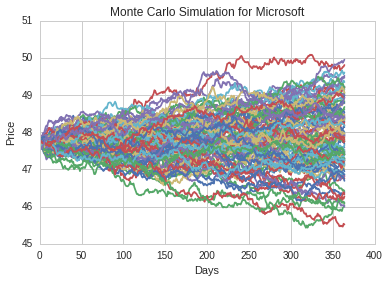

In [19]:
# Running the Monte Carlo simulation a hundred times

start_price = 47.700001

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Simulation for Microsoft')

In [20]:
# Analysing the Monte Carlo Simulation for 10,000 simulations

runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]
    
# 1 percent impirical quantile or 99% Confidence Interval

q = np.percentile(simulations,1)

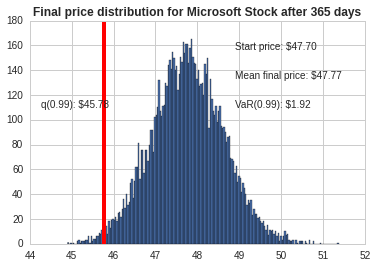

In [21]:
# Plotting the final Risk Analysis plot using Monte Carlo Simulation

plt.hist(simulations,bins=200)

plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Microsoft Stock after %s days" % days, weight='bold');